# Assignment Title: Artificial Vision and Deep Learning
# Module: AINT 515 and AINT 515Z
# Section: Two (2)

## Objectives

The aim of this study is to classify the CIFAR-10 data through the experimentation of different convolutional layer using Convolutional Neural Networks (CNNs). this study aims to bolster the effectiveness of automated image recognition systems, with potential applications in areas such as autonomous vehicles, medical imaging, and surveillance.

## Data Description

The CIFAR-10 dataset comprises 60,000 32x32 color images in 10 classes, with 6,000 images per class commonly used for image classification tasks in machine learning and computer vision research.In this research, the dataset will be imported using the tensorflow package


# List of classes

- Airplanes
- Automobiles
- birds
- cats
- deer
- dogs
- frogs
- horses
- ships
- trucks.

# Importing the required packages


In [ ]:
import cv2          # openCV for image processing
import pandas as pd       # to read CSV files for the label and for data manipulation
import os # to access operating system ; for files and directories
import numpy as np     # Importing numpy for Matrix Operations
from PIL import Image #for image processing, opening and manipulation
import matplotlib.pyplot as plt  # for  visualizing images
import seaborn as sns  # to plot graphs
import math       # for mathematical operations
import tensorflow as tf # Tensorflow library for deep learning operations
from tensorflow.keras.datasets import cifar10 # to load the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator   # for data augmentation
from tensorflow.keras.optimizers import Adam,SGD   # deep learning model optimizers to enhance the performance
from tensorflow.keras.models import Sequential  # to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization
# the layers used to build CNN Model
from sklearn import preprocessing                       # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split    # for data splitting
from sklearn.preprocessing import LabelEncoder # To convert labels to numbers
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # to plot and display the confusion matrix for model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score #classification metrics

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [ ]:

# Load CIFAR-10 dataset
(cifar_train_images, cifar_train_labels), (cifar_test_images, cifar_test_labels) = cifar10.load_data()

print("Training images shape:", cifar_train_images.shape)
print("Training labels shape:", cifar_train_labels.shape)
print("Test images shape:", cifar_test_images.shape)
print("Test labels shape:", cifar_test_labels.shape)


170498071/170498071 [==============================] - 4s 0us/step
Training images shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


- the dataset consist of 50000 train images and 10000 test images with shape 32 by 32

# Exploratory data analysis

In [ ]:
# identifying the number of classes in the image dataset
classes = tf.unique(cifar_train_labels[:, 0])[0]

# Print the number of classes
print("Number of classes:", len(classes))

Number of classes: 10


In [ ]:
# class names
print(classes)

tf.Tensor([6 9 4 1 2 7 8 3 5 0], shape=(10,), dtype=uint8)


In [ ]:
# Dictionary mapping class indices to class names
class_names = {
    0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer',
    5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'
}

# Print class names
for class_index in classes:
    print(f"Class {class_index.numpy()}: {class_names[class_index.numpy()]}")

Class 6: frog
Class 9: truck
Class 4: deer
Class 1: automobile
Class 2: bird
Class 7: horse
Class 8: ship
Class 3: cat
Class 5: dog
Class 0: airplane


## Exploring class imbalance

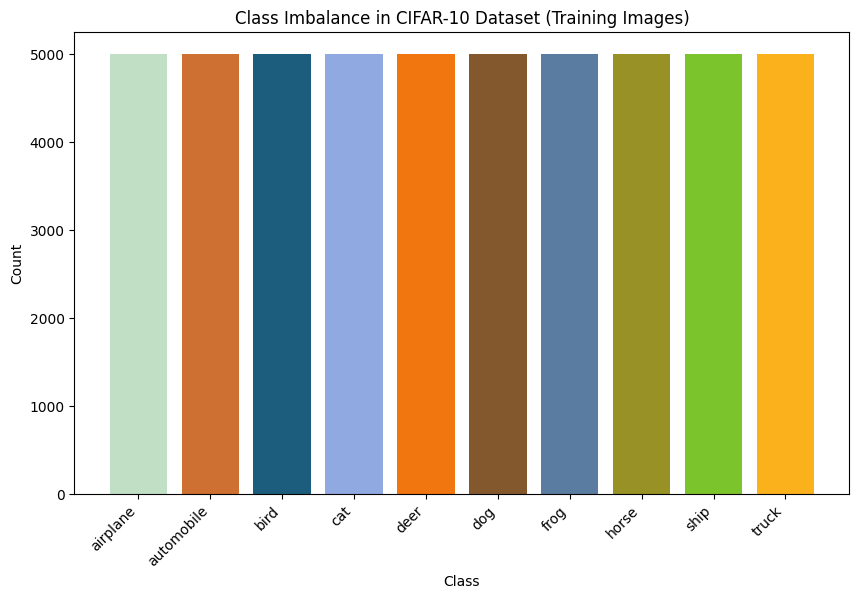

In [ ]:
# Count the occurrences of each class in the training dataset
class_counts = {class_index: 0 for class_index in range(10)}
for label in cifar_train_labels[:, 0]:
    class_counts[label] += 1

# Extract class names and counts
class_names = [class_names[class_index] for class_index in range(10)]
counts = [class_counts[class_index] for class_index in range(10)]

# Generate random colors for each class
colors = np.random.rand(10, 3)  # Generate random RGB values for 10 classes

# Create bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(class_names, counts, color=colors)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Imbalance in CIFAR-10 Dataset (Training Images)')
plt.xticks(rotation=45, ha='right')

plt.show()


- the dataset is balanced

# Image Visualization

Samples of the images will be visualized to verify that they correspond with their classes

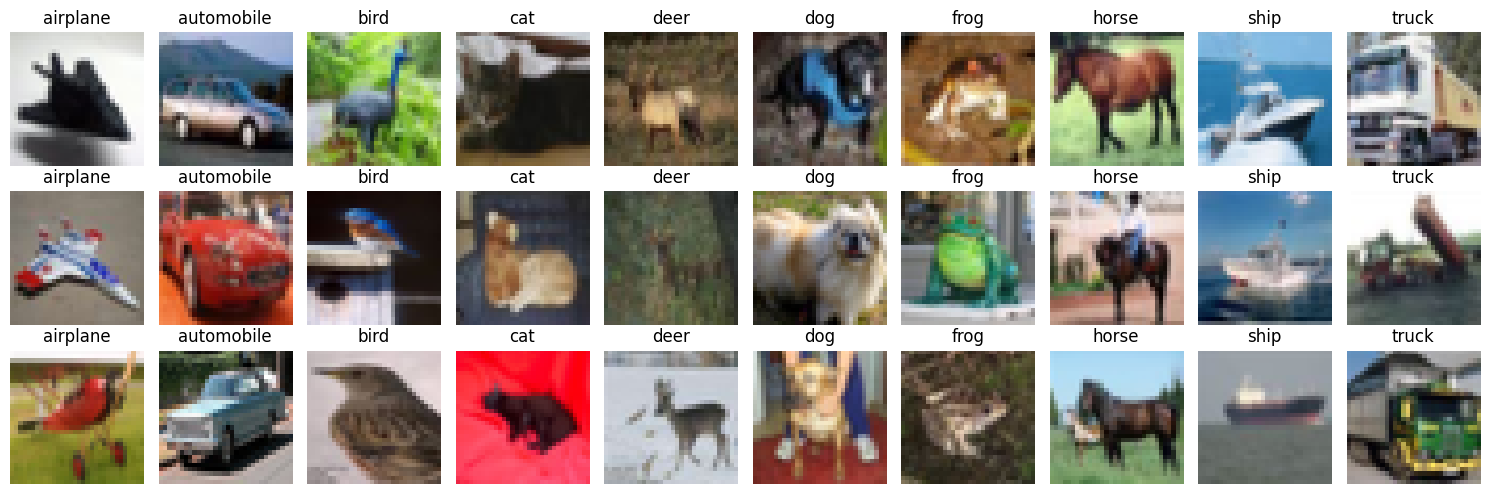

In [ ]:
# Define function to plot images
def plot_cifar_samples(images, labels, class_names):
    plt.figure(figsize=(15, 5))
    for i in range(10):  # Iterate over each class
        class_indices = np.where(labels[:, 0] == i)[0][:3]
        for j, idx in enumerate(class_indices):
            plt.subplot(3, 10, i + j*10 + 1)
            plt.imshow(images[idx])
            plt.title(class_names[i])
            plt.axis('off')
    plt.tight_layout()
    plt.show()

# Plot three samples from each class
plot_cifar_samples(cifar_train_images, cifar_train_labels, class_names)


### Image Data Preprocessing

Several preprocessing techniques will be implemented prior to modelling. Since the images have already been resized, the resizing preporocessing metthod will be excluded. Other methods include;
1. Normalization
2. Data Augmentation
3. Label Encoding

### Normalization
The training and testing images will undergo normalization to enhance the  stability and efficacy of the training process. This involves dividing their pixel values by 255, ensuring consistent pixel values within the range of 0 to 1. Deep learning models, along with their activation functions, tend to function more effectively with smaller input image values; excessively large values may induce instability. Normalizing by dividing by 255 not only helps address overfitting by regularization but also enhances the model's performance on unseen data (test set).

In [ ]:
# Normalizing training images
normalized_train_images = cifar_train_images / 255.0

# Normalizing test images
normalized_test_images = cifar_test_images / 255.0


In [ ]:
normalized_train_images

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

- the images have been normalized

**2. Data Augmentation**

Several variations of the cifar training images will be generateds in order to increase the diversity of the image dataset. Augmentations approaches that wil be explored include such as flipping, rotation, geometric transformation. This pre-processing method is optional and will be augmented training images experimented seperately during training to compare accuracies

In [ ]:
train_datagen = ImageDataGenerator(
                              rotation_range=180,
                              fill_mode='nearest',
                              horizontal_flip = True,
                              vertical_flip = True,
                              shear_range = 0.2,
                              zoom_range = 0.2
                              )
# only the train set will be augmented

**2. Label Encoding**


In [ ]:
# Initialize LabelEncoder
le = LabelEncoder()

# encode training labels
encoded_train_labels = le.fit_transform(cifar_train_labels[:, 0])

# encode testing labels
encoded_test_labels = le.transform(cifar_test_labels[:, 0])


In [ ]:
encoded_train_labels

array([6, 9, 9, ..., 9, 1, 1])

In [ ]:
# Check the unique labels and create num_classes
num_classes = len(classes)
num_classes

10

# Model Development
A number of CNN-based deep learning models will be explored in this study in order to classify the cifar-10 images into their respective classes. This includes experimentation with different optimisers, different learning rates and a different number of epochs. The workflow will begin with a comprehensive feature extraction stage using convolutional layers to extract intricate features from the train images

# Model 1: Basic CNN without Data Augmentation
- Basic/ Custom CNN
- Dataset: Normalized images without Augmentation
- Opptimizer: Adam
- Dropout: Used
- Batch Normalization: Used
- Number of epochs: 20
- Batch Size: 32
- Learning rate; 0.001
- Activation: ReLU
- Convolutional blocks: 2

In [ ]:
# importing necessary modules
from tensorflow.keras import layers, Sequential
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.regularizers import l2

# initiating the sequential model used build the neural network layer by layer.
basic_model_1 = Sequential()

# first convolutional block
basic_model_1.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu",
                               input_shape=(32, 32, 3), padding = 'same'))
# using 32 filters,3x3 kernel with ReLU activation function
basic_model_1.add(layers.BatchNormalization(axis=3))
""" this normalizes the activations of the convolution layer, which helps stabilize and accelerate training."""
basic_model_1.add(layers.MaxPool2D((2,2)))
"""using 2x2 pool size; this reduces spatial dimension of the layers from previous filters, preserving important features """

# second convolutional block
basic_model_1.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding = 'same'))
basic_model_1.add(layers.BatchNormalization(axis=3))
basic_model_1.add(layers.MaxPool2D((2,2)))

# flatten layer:
basic_model_1.add(layers.Flatten())

# Dense layer: to capture complex patterns
basic_model_1.add(layers.Dense(64, activation="relu")) # using 64 units and ReLU activation

# dropout layer: to randomly deactivate some neurons during training thereby preventing overfitting
basic_model_1.add(layers.Dropout(0.25)) # using a dropout rate of 25%.

# final dense layer: using the number of classes as unit with softmax activation since there are multiple classes.
basic_model_1.add(layers.Dense(num_classes, activation='softmax'))

### Model Summary
basic_model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 64)        256       
 chNormalization)                                                
                                                        

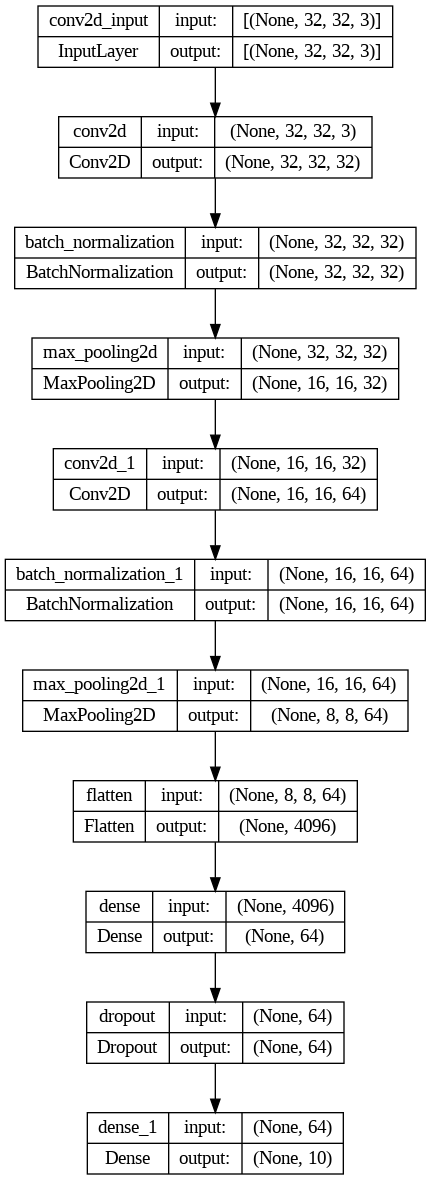

In [ ]:
# plotting the model architecture
from tensorflow.keras.utils import plot_model


# Save model diagram to file
plot_model(basic_model_1, to_file='basic_cnn.png', show_shapes=True)

### Custom CNN Compilation
the model will be compiled initially using the Adam optimizer by setting the learning rate to 0.001

In [ ]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy

basic_model_1.compile(optimizer=Adam(learning_rate=0.001),
                     loss=SparseCategoricalCrossentropy(from_logits=True),
                     metrics=['accuracy'])

# define early stopping layer
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor = "val_loss" , patience = 3, mode = "min", verbose = 2)

### Training the custom CNN model
Batch size of 32 will used so as to update the model's weights after processing each batch of 32 training samples while the data will be trained for 20 epochs

In [ ]:
# Fit the model using the training data
history_1 = basic_model_1.fit(normalized_train_images, encoded_train_labels, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
1250/1250 [==============================] - 90s 71ms/step - loss: 1.6524 - accuracy: 0.4025 - val_loss: 1.3534 - val_accuracy: 0.5103
Epoch 2/20
1250/1250 [==============================] - 89s 71ms/step - loss: 1.2772 - accuracy: 0.5422 - val_loss: 1.2404 - val_accuracy: 0.5605
Epoch 3/20
1250/1250 [==============================] - 84s 67ms/step - loss: 1.1213 - accuracy: 0.5999 - val_loss: 1.1631 - val_accuracy: 0.5951
Epoch 4/20
1250/1250 [==============================] - 86s 69ms/step - loss: 1.0285 - accuracy: 0.6392 - val_loss: 1.0717 - val_accuracy: 0.6188
Epoch 5/20
1250/1250 [==============================] - 88s 70ms/step - loss: 0.9313 - accuracy: 0.6725 - val_loss: 0.9539 - val_accuracy: 0.6679
Epoch 6/20
1250/1250 [==============================] - 91s 73ms/step - loss: 0.8623 - accuracy: 0.6973 - val_loss: 0.9628 - val_accuracy: 0.6798
Epoch 7/20
1250/1250 [==============================] - 82s 66ms/step - loss: 0.8012 - accuracy: 0.7192 - val_loss: 0.9155 -

## Model Evaluation

In [ ]:
# Defining a function to visualize the accuracy and loss of all models accross each epoch

def accuracy_and_loss(history, cnn_name):

    """
    History represents the saved performance of a specific model
    cnn_name is the name of the model
    """
    # Create subplots with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # training and validation loss
    ax1.plot(history.history['loss'], marker='o', label='Training Loss') # adding marker at each epoch
    ax1.plot(history.history['val_loss'], marker='o', label='Validation Loss')
    ax1.set_title(f"{cnn_name} Loss Over Epochs")
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend(loc='upper right')

    # training and validation accuracy
    ax2.plot(history.history['accuracy'], marker='*', label='Training Accuracy')
    ax2.plot(history.history['val_accuracy'], marker='*', label='Validation Accuracy')
    ax2.set_title(f"{cnn_name} Accuracy Over Epochs")
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend(loc='lower right')

    # Adjust layout and save the plot
    plt.tight_layout()
    plt.savefig(f"{cnn_name}_loss_accuracy_subplot_with_markers.png")
    plt.show()

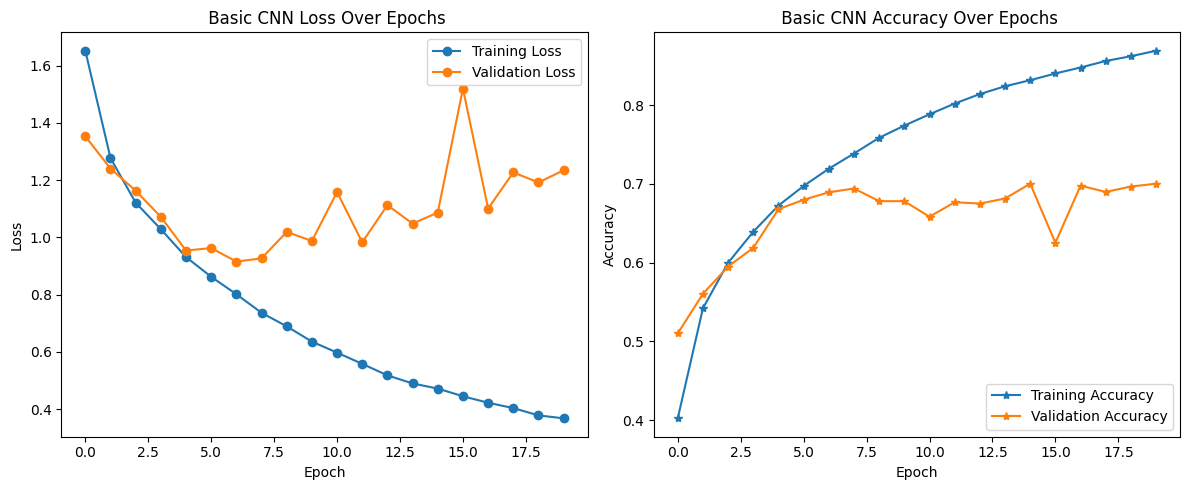

In [ ]:
accuracy_and_loss(history_1, cnn_name=" Basic CNN")


- the model loss decreased accross each epoch while the accuracy gradually increased from the first epoch to the last epoch; this indicates that the model learned intricate features from the cifar-10 dataset. However, the training performance is more superior than the validation performance. Hence, the model is slightly overfitting

-

### Confusion matrix

In [ ]:
# define a function to plot and display confusion matrix
def visualize_confusion_matrix(model):
  # Load images if x_test is a list of paths
  if isinstance(normalized_test_images, list):
      x_test = np.array([load_image(path) for path in normalized_test_images])
  else:
      x_test = normalized_test_images

  # Predict with the model
  y_pred = model.predict(x_test)

  # Extract true labels
  y_true = cifar_test_labels[:, 0]

  # Define CIFAR-10 classes
  cifar_classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  # Calculate and display the confusion matrix
  cm = confusion_matrix(y_true, np.argmax(y_pred, axis=1))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cifar_classes)

  # Adjusting the layout and colors
  fig, ax = plt.subplots(figsize=(6, 6))
  disp.plot(cmap='Blues', values_format='d', ax=ax, colorbar=False)
  plt.grid(False)  # to remove the grid lines
  plt.tight_layout()
  plt.show()


313/313 [==============================] - 5s 17ms/step


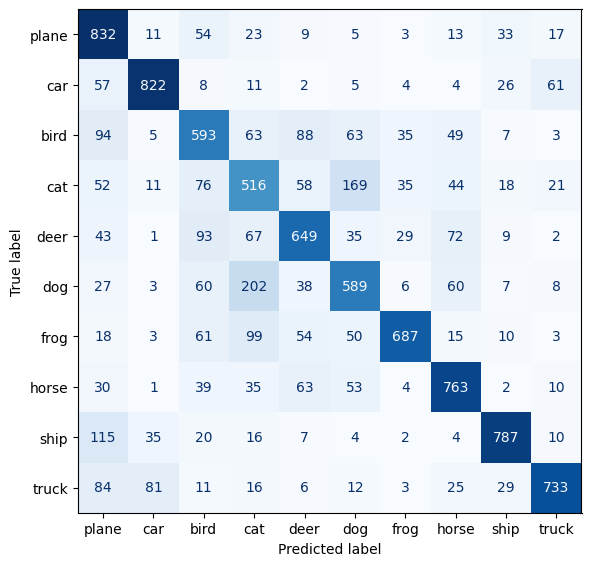

In [ ]:
# Visualize the confusion matrix for the distribution of true positives and false positive

visualize_confusion_matrix(basic_model_1)

- Majority of the cifar test images were correctly classified as shown in the diagonal of the confusion matrix

- 832 plane images were correctly classified as planes

- 822 car images were correctly classified

- however, the model is making few mistakes by presenting some false negatives and false positives for instance 202 images of dogs were wrongly classified as cats while 81 images of truck were wrongly classified as cars

- other methods will be experimented to address this misclassification for instance augmentation, removal of batch normalization, experiemtation with different optimizers, transfer learning, among others

In [ ]:
accuracy = basic_model_1.evaluate(normalized_test_images, cifar_test_labels, verbose=1)
print("Test Accuracy:", accuracy[1])


313/313 [==============================] - 5s 16ms/step - loss: 1.2460 - accuracy: 0.6971
Test Accuracy: 0.6970999836921692


# Classification metrics

In [ ]:
# define a funtion to show the classification metrics performance of models to be developed on the unseen test cifar images
def classification_metrics(model):
    # Predict with the model
    y_pred = model.predict(normalized_test_images)

    # Extract true labels
    y_true = cifar_test_labels[:, 0]

    # Calculate accuracy
    accuracy = accuracy_score(y_true, np.argmax(y_pred, axis=1))
    print(f'Accuracy: {accuracy:.4f}')

    # Calculate precision
    precision = precision_score(y_true, np.argmax(y_pred, axis=1), average='weighted')
    print(f'Precision: {precision:.4f}')

    # Calculate recall
    recall = recall_score(y_true, np.argmax(y_pred, axis=1), average='weighted')
    print(f'Recall: {recall:.4f}')

    # Calculate F1 score
    f1 = f1_score(y_true, np.argmax(y_pred, axis=1), average='weighted')
    print(f'F1 Score: {f1:.4f}')

In [ ]:
# evaluation result of the first model
classification_metrics(basic_model_1)

313/313 [==============================] - 5s 17ms/step
Accuracy: 0.6971
Precision: 0.7071
Recall: 0.6971
F1 Score: 0.6990


- the first model demonstrates an approximately 70% performance accross the major classification metrics. This performance is above average and can be enhanced by experimenting methods such as augmentation, hyperparameter tuning, tweaking of optimizers, and so on.

# Model 2: Basic CNN with Data Augmentation

- Basic/ Custom CNN
- Dataset: Normalized images with Augmentation
- Opptimizer: Adam
- Dropout: Used
- Batch Normalization: Used
- Number of Epochs: 15
- Batch Size: 64
- Learning rate; 0.001
- Activation: reLU
- Convolutional blocks: 2

In [ ]:
# initiating the sequential model used build the neural network layer by layer.
basic_model_2 = Sequential()

# first convolutional block
basic_model_2.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu",
                               input_shape=(32, 32, 3), padding = 'same'))
# using 32 filters,3x3 kernel with ReLU activation function
basic_model_2.add(layers.BatchNormalization(axis=3))
""" this normalizes the activations of the convolution layer, which helps stabilize and accelerate training."""
basic_model_2.add(layers.MaxPool2D((2,2)))
"""using 2x2 pool size; this reduces spatial dimension of the layers from previous filters, preserving important features """

# second convolutional block
basic_model_2.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding = 'same'))
basic_model_2.add(layers.BatchNormalization(axis=3))
basic_model_2.add(layers.MaxPool2D((2,2)))

# flatten layer:
basic_model_2.add(layers.Flatten())

# Dense layer: to capture complex patterns
basic_model_2.add(layers.Dense(64, activation="relu")) # using 64 units and ReLU activation

# dropout layer: to randomly deactivate some neurons during training thereby preventing overfitting
basic_model_2.add(layers.Dropout(0.25)) # using a dropout rate of 25%.

# final dense layer: using the number of classes as unit with softmax activation since there are multiple classes.
basic_model_2.add(layers.Dense(num_classes, activation='softmax'))

### Model Summary
basic_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_2 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_3 (Bat  (None, 16, 16, 64)        256       
 chNormalization)                                                
                                                      

In [ ]:
# compile the model
basic_model_2.compile(optimizer=Adam(learning_rate=0.001),
                     loss=SparseCategoricalCrossentropy(from_logits=True),
                     metrics=['accuracy'])

In [ ]:
# train the model using the augmented dataset
#normalized_train_images = np.array(normalized_train_images)
history_2 = basic_model_2.fit(
    train_datagen.flow(normalized_train_images, encoded_train_labels, batch_size=64, seed=0, shuffle=False),
    epochs=15,
    steps_per_epoch=normalized_train_images.shape[0] // 64,
    validation_data=(normalized_test_images, encoded_test_labels),
    verbose=1
)


Epoch 1/15
781/781 [==============================] - 125s 159ms/step - loss: 1.7956 - accuracy: 0.3442 - val_loss: 1.6637 - val_accuracy: 0.3988
Epoch 2/15
781/781 [==============================] - 121s 154ms/step - loss: 1.6921 - accuracy: 0.3813 - val_loss: 1.6622 - val_accuracy: 0.3882
Epoch 3/15
781/781 [==============================] - 127s 163ms/step - loss: 1.6339 - accuracy: 0.4033 - val_loss: 1.5832 - val_accuracy: 0.4327
Epoch 4/15
781/781 [==============================] - 120s 153ms/step - loss: 1.5944 - accuracy: 0.4198 - val_loss: 1.4997 - val_accuracy: 0.4498
Epoch 5/15
781/781 [==============================] - 128s 164ms/step - loss: 1.5585 - accuracy: 0.4305 - val_loss: 1.4720 - val_accuracy: 0.4743
Epoch 6/15
781/781 [==============================] - 121s 155ms/step - loss: 1.5256 - accuracy: 0.4504 - val_loss: 1.7179 - val_accuracy: 0.3999
Epoch 7/15
781/781 [==============================] - 119s 153ms/step - loss: 1.4935 - accuracy: 0.4610 - val_loss: 1.4526 -

## Model Evaluation

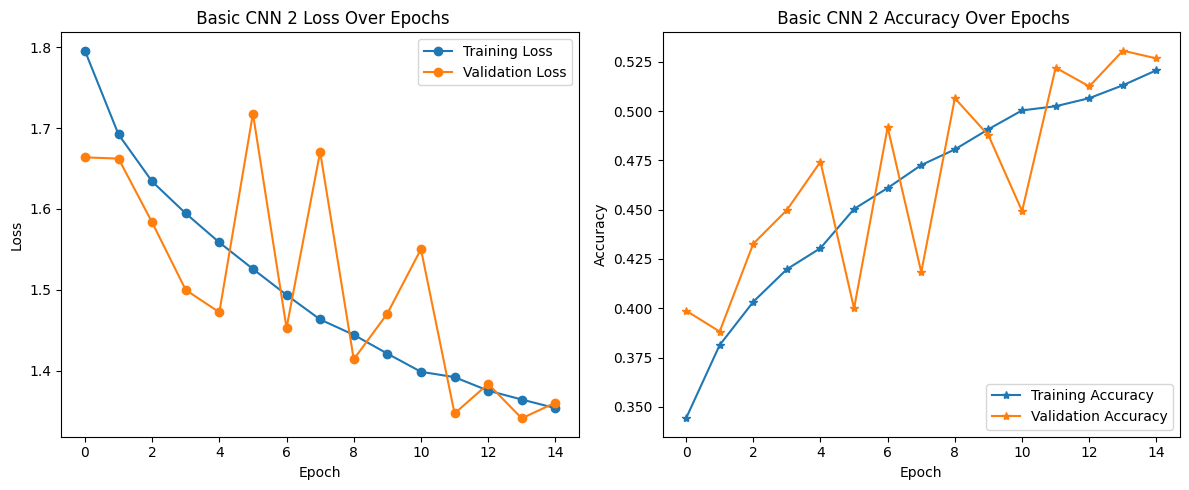

In [ ]:
accuracy_and_loss(history_2, cnn_name=" Basic CNN 2")


- the model is overfitting

313/313 [==============================] - 10s 30ms/step


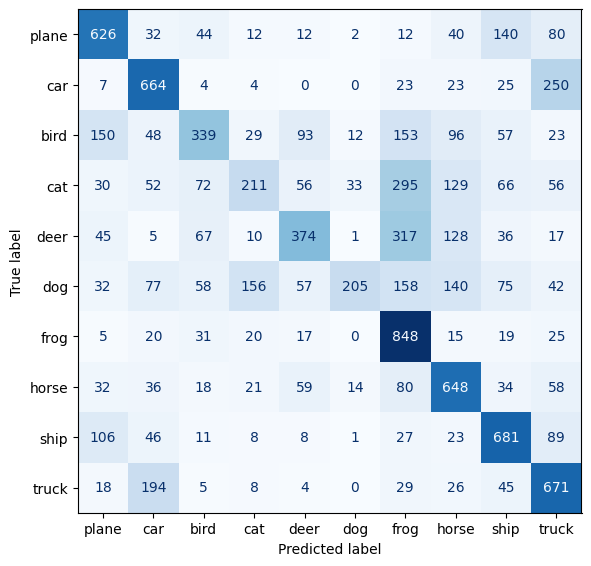

In [ ]:
# Visualize the confusion matrix for the distribution of true positives and false positives

visualize_confusion_matrix(basic_model_2)

- the model built using the augmented data is making more mistakes than that of the original dataset

In [ ]:
# evaluation result of the second model
classification_metrics(basic_model_2)

313/313 [==============================] - 11s 34ms/step
Accuracy: 0.5267
Precision: 0.5477
Recall: 0.5267
F1 Score: 0.5040


# Model 3: Basic CNN with Tweaked hyperparameters

Given the superior performance of the CNN model trained on the original normalized data compared to the augmented dataset, the former will be replicated with adjusted hyperparameters to explore potential enhancements.

- Basic/ Custom CNN
- Dataset: Normalized images  
- Opptimizer: SGD
- Dropout: Not Used
- Batch Normalization: Not Used
- Number of Epochs: 15
- Batch Size: 64
- Learning rate; 0.0001
- Activation: leaky_relu
- Convolutional blocks: increased to 3

In [ ]:
# Define Leaky ReLU activation function
def leaky_relu(x, alpha=0.01):
    return tf.maximum(alpha * x, x)

# initiating the sequential model used build the neural network layer by layer.
basic_model_3 = Sequential()

# first convolutional block
basic_model_3.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation=leaky_relu,
                               input_shape=(32, 32, 3), padding = 'same'))
# using 32 filters,3x3 kernel with ReLU activation function
basic_model_3.add(layers.MaxPool2D((2,2)))
"""using 2x2 pool size; this reduces spatial dimension of the layers from previous filters, preserving important features """

# second convolutional block
basic_model_3.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation=leaky_relu, padding = 'same'))
basic_model_3.add(layers.MaxPool2D((2,2)))

# third convolutional block
basic_model_3.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation=leaky_relu, padding = 'same'))
basic_model_3.add(layers.MaxPool2D((2,2)))

# flatten layer:
basic_model_3.add(layers.Flatten())

# Dense layer: to capture complex patterns
basic_model_3.add(layers.Dense(64, activation=leaky_relu)) # using 64 units and leaky_relu activation

# final dense layer: using the number of classes as unit with softmax activation since there are multiple classes.
basic_model_3.add(layers.Dense(num_classes, activation='softmax'))

### Model Summary
basic_model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 4, 4, 64)         

In [ ]:
# compile the model and reduce the learning rate to 0.0001
basic_model_3.compile(optimizer=Adam(learning_rate=0.0001),
                     loss=SparseCategoricalCrossentropy(from_logits=True),
                     metrics=['accuracy'])

In [ ]:
# Fit the model using the training data
history_3 = basic_model_3.fit(normalized_train_images, encoded_train_labels, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
1250/1250 [==============================] - 98s 76ms/step - loss: 1.8181 - accuracy: 0.3438 - val_loss: 1.5823 - val_accuracy: 0.4317
Epoch 2/20
1250/1250 [==============================] - 101s 80ms/step - loss: 1.5074 - accuracy: 0.4601 - val_loss: 1.4384 - val_accuracy: 0.4840
Epoch 3/20
1250/1250 [==============================] - 95s 76ms/step - loss: 1.3902 - accuracy: 0.5045 - val_loss: 1.3420 - val_accuracy: 0.5261
Epoch 4/20
1250/1250 [==============================] - 95s 76ms/step - loss: 1.3130 - accuracy: 0.5358 - val_loss: 1.2817 - val_accuracy: 0.5517
Epoch 5/20
1250/1250 [==============================] - 99s 79ms/step - loss: 1.2494 - accuracy: 0.5598 - val_loss: 1.2481 - val_accuracy: 0.5684
Epoch 6/20
1250/1250 [==============================] - 99s 79ms/step - loss: 1.2059 - accuracy: 0.5787 - val_loss: 1.2150 - val_accuracy: 0.5757
Epoch 7/20
1250/1250 [==============================] - 104s 83ms/step - loss: 1.1571 - accuracy: 0.5937 - val_loss: 1.1707

## Model Evaluation

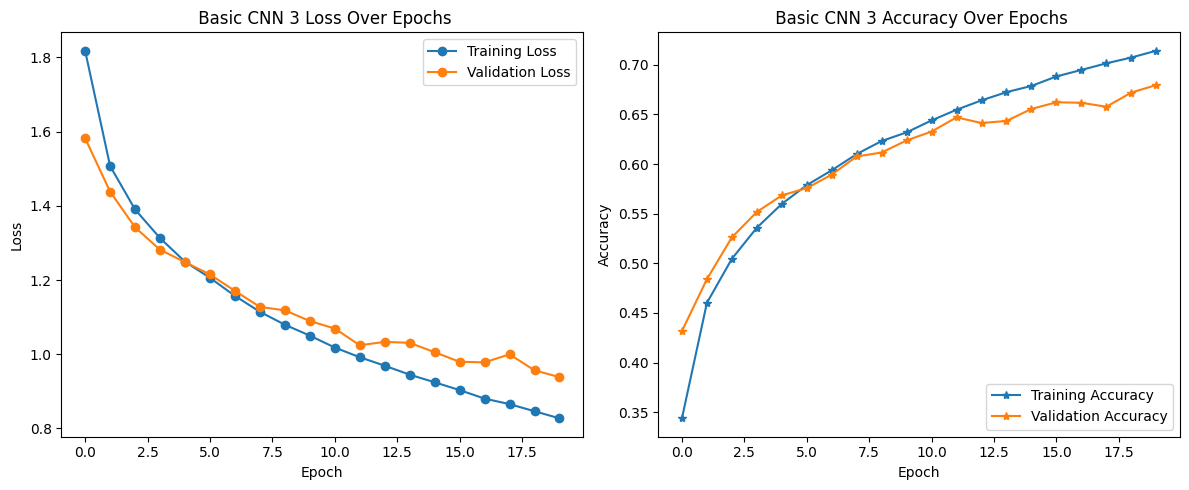

In [ ]:
 # check the CNN model loss and history
 accuracy_and_loss(history_3, cnn_name=" Basic CNN 3")


313/313 [==============================] - 7s 22ms/step


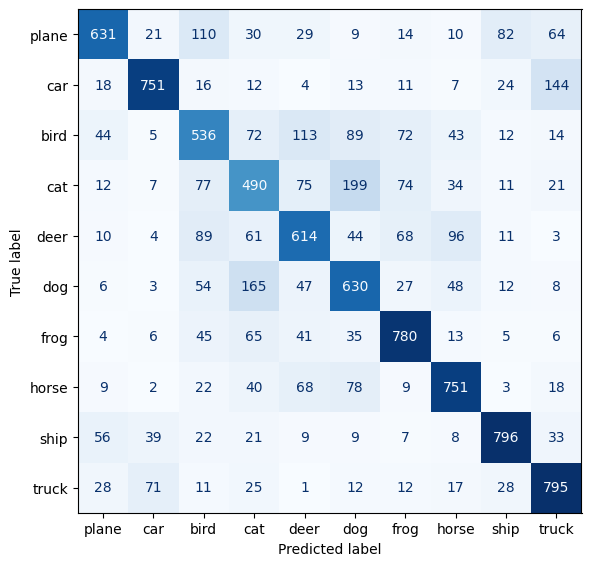

In [ ]:
# Visualize the confusion matrix for the distribution of true positives and false positives

visualize_confusion_matrix(basic_model_3)

In [ ]:
# evaluation result of the third model
classification_metrics(basic_model_3)

313/313 [==============================] - 8s 25ms/step
Accuracy: 0.6774
Precision: 0.6805
Recall: 0.6774
F1 Score: 0.6776


- The third models built with with exception of batch normalization, dropout and reduced learning rate exhibited lower performance compared to the first model which has 2 convolutional blocks with batch normalization and dropout.

# Model 4: Basic CNN with a different Optimizer - SDG

The first model has proven to be the best among the three models built, hence, it's hyperparameters will be adjusted using a different optimizer to explore potential improvement
- Basic/ Custom CNN
- Dataset: Normalized images without Augmentation
- Optimizer: SDG
- Dropout: Used
- Batch Normalization: Used
- Number of epochs: 20
- Batch Size: 32
- Learning rate; 0.001
- Activation: ReLU
- Convolutional blocks: 2

In [ ]:
# initiating the sequential model used build the neural network layer by layer.
basic_model_4 = Sequential()

# first convolutional block
basic_model_4.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu",
                               input_shape=(32, 32, 3), padding = 'same'))
# using 32 filters,3x3 kernel with ReLU activation function
basic_model_4.add(layers.BatchNormalization(axis=3))
""" this normalizes the activations of the convolution layer, which helps stabilize and accelerate training."""
basic_model_4.add(layers.MaxPool2D((2,2)))
"""using 2x2 pool size; this reduces spatial dimension of the layers from previous filters, preserving important features """

# second convolutional block
basic_model_4.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding = 'same'))
basic_model_4.add(layers.BatchNormalization(axis=3))
basic_model_4.add(layers.MaxPool2D((2,2)))

# flatten layer:
basic_model_4.add(layers.Flatten())

# Dense layer: to capture complex patterns
basic_model_4.add(layers.Dense(64, activation="relu")) # using 64 units and ReLU activation

# dropout layer: to randomly deactivate some neurons during training thereby preventing overfitting
basic_model_4.add(layers.Dropout(0.25)) # using a dropout rate of 25%.

# final dense layer: using the number of classes as unit with softmax activation since there are multiple classes.
basic_model_4.add(layers.Dense(num_classes, activation='softmax'))

### Model Summary
basic_model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_4 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_5 (Bat  (None, 16, 16, 64)        256       
 chNormalization)                                                
                                                      

In [ ]:
from tensorflow.keras.optimizers import SGD

# Changing the the optimizer to SGD (Stochastic Gradient Descent) with momentum
optimizer = SGD(learning_rate=0.0001, momentum=0.9)

# Compile
basic_model_4.compile(optimizer=optimizer,
                      loss=SparseCategoricalCrossentropy(from_logits=True),
                      metrics=['accuracy'])


In [ ]:
# Fit the model using the original normalized data
history_4 = basic_model_4.fit(normalized_train_images, encoded_train_labels, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
1250/1250 [==============================] - 86s 68ms/step - loss: 1.9208 - accuracy: 0.3187 - val_loss: 1.6134 - val_accuracy: 0.4314
Epoch 2/20
1250/1250 [==============================] - 88s 70ms/step - loss: 1.6148 - accuracy: 0.4259 - val_loss: 1.4687 - val_accuracy: 0.4899
Epoch 3/20
1250/1250 [==============================] - 88s 70ms/step - loss: 1.4751 - accuracy: 0.4742 - val_loss: 1.3532 - val_accuracy: 0.5223
Epoch 4/20
1250/1250 [==============================] - 86s 69ms/step - loss: 1.3887 - accuracy: 0.5030 - val_loss: 1.3478 - val_accuracy: 0.5215
Epoch 5/20
1250/1250 [==============================] - 85s 68ms/step - loss: 1.3126 - accuracy: 0.5321 - val_loss: 1.2346 - val_accuracy: 0.5643
Epoch 6/20
1250/1250 [==============================] - 85s 68ms/step - loss: 1.2582 - accuracy: 0.5480 - val_loss: 1.2089 - val_accuracy: 0.5780
Epoch 7/20
1250/1250 [==============================] - 84s 67ms/step - loss: 1.2148 - accuracy: 0.5697 - val_loss: 1.2116 -

## Model  Evaluation

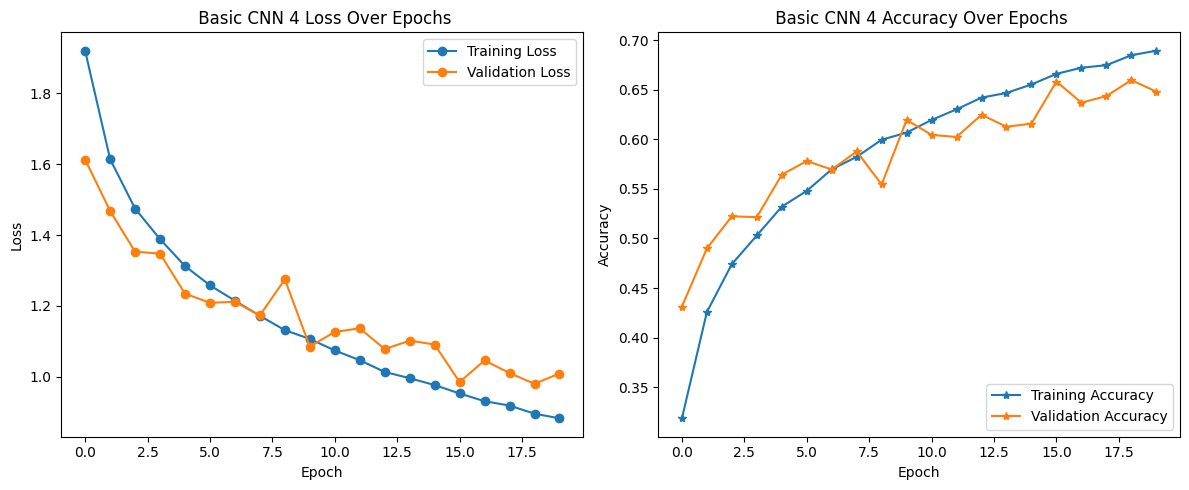

In [ ]:
 # check the CNN model loss and history
 accuracy_and_loss(history_4, cnn_name=" Basic CNN 4")


313/313 [==============================] - 12s 37ms/step


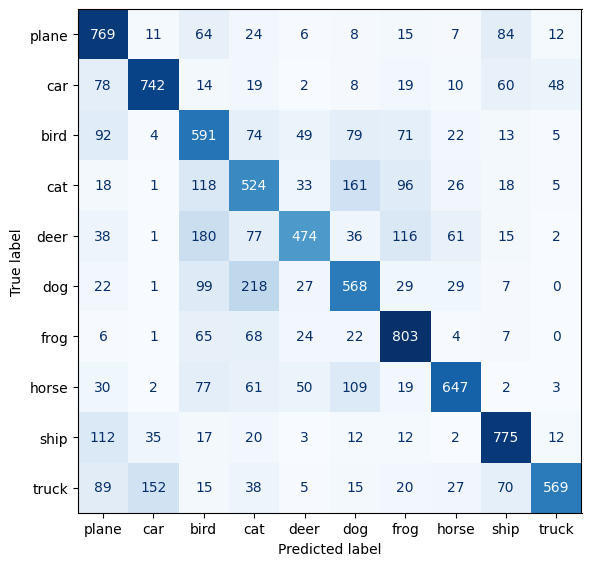

In [ ]:
# Visualize the confusion matrix for the distribution of true positives and false positives
visualize_confusion_matrix(basic_model_4)

In [ ]:
# evaluation result of the third model
classification_metrics(basic_model_4)

313/313 [==============================] - 9s 27ms/step
Accuracy: 0.6462
Precision: 0.6649
Recall: 0.6462
F1 Score: 0.6472


# Model 5: Enhanced CNN using Transfer Learning

This involves exploring transfer learning methods by leveraging on pre-trianed weights from previous models and adapting them to this experiment in order to improve the performance.

- **Densenet-201 will be employed**

In [ ]:
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.models import Model

# Load DenseNet-201 model without top (fully connected) layers
densenet201_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Check the summary of the modified DenseNet-201 model
densenet201_model.summary()


74836368/74836368 [==============================] - 1s 0us/step
Model: "densenet201"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 38, 38, 3)            0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 16, 16, 64)           9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormali

In [ ]:
# freezing the layers
for layer in densenet201_model.layers:
    layer.trainable = False

In [ ]:
# DenseNet 201 Architecture
model_densenet201 = Sequential()
model_densenet201.add(densenet201_model)
model_densenet201.add(Flatten())

# Adding a dense output layer
model_densenet201.add(Dense(64, activation='relu'))
#model_densenet201.add(Dropout(0.2))
model_densenet201.add(Dense(32, activation='relu'))
model_densenet201.add(Dense(num_classes, activation='softmax'))
opt=Adam()
# Compile model
model_densenet201.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# summary
model_densenet201.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 1, 1, 1920)        18321984  
                                                                 
 flatten_4 (Flatten)         (None, 1920)              0         
                                                                 
 dense_8 (Dense)             (None, 64)                122944    
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 10)                330       
                                                                 
Total params: 18447338 (70.37 MB)
Trainable params: 125354 (489.66 KB)
Non-trainable params: 18321984 (69.89 MB)
_________________________________________________________________


In [ ]:
# fit the model
densenet201_history = model_densenet201.fit(normalized_train_images, encoded_train_labels, epochs=20, batch_size=32,
                                            validation_split=0.2, verbose=1)

Epoch 1/20
1250/1250 [==============================] - 291s 219ms/step - loss: 1.3299 - accuracy: 0.5316 - val_loss: 1.1839 - val_accuracy: 0.5867
Epoch 2/20
1250/1250 [==============================] - 259s 208ms/step - loss: 1.0937 - accuracy: 0.6155 - val_loss: 1.1203 - val_accuracy: 0.6032
Epoch 3/20
1250/1250 [==============================] - 294s 236ms/step - loss: 1.0197 - accuracy: 0.6416 - val_loss: 1.1035 - val_accuracy: 0.6092
Epoch 4/20
1250/1250 [==============================] - 293s 234ms/step - loss: 0.9663 - accuracy: 0.6597 - val_loss: 1.0912 - val_accuracy: 0.6151
Epoch 5/20
1250/1250 [==============================] - 301s 241ms/step - loss: 0.9262 - accuracy: 0.6729 - val_loss: 1.1090 - val_accuracy: 0.6092
Epoch 6/20
1250/1250 [==============================] - 350s 280ms/step - loss: 0.8836 - accuracy: 0.6858 - val_loss: 1.1110 - val_accuracy: 0.6128
Epoch 7/20
1250/1250 [==============================] - 293s 235ms/step - loss: 0.8468 - accuracy: 0.6981 - val_

- the performance is not satisfactory; hence, the model will be enhanced further by leveraging on the weights of the first model which has demostrated the best performance so far

## Model Evaluation

In [ ]:
 # check the CNN model loss and history
 # accuracy_and_loss(densenet201_history, cnn_name=" DenseNet 201")

In [ ]:
# Visualize the confusion matrix for the distribution of true positive, false positive, true negative, and false negative predictions
# visualize_confusion_matrix(model_densenet201)

In [ ]:
# evaluation result of the third model
# classification_metrics(model_densenet201)

# Model 6: Enhanced CNN using Hyperparameter Tuning
- Generating the best hyperparameter combination using RandomSearch
- Building a final model by leveraging on the weights of the first CNN (basic_model_1)

Rather than manually tweaking hyperparameters including activation functions, learning rates and optimizers, we will be feeding randomsearch from sci-kit learn with various hyperparameters and allow it to generate the best hyperparameter combination that will yield the optimum result

In [ ]:
#pip install keras-tuner


In [ ]:
# importing required packages
import tensorflow as tf
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
from sklearn.model_selection import ParameterGrid


In [ ]:
# define a dictionary specifying the hyperparameter options
#
"""
the keys in the dictionary represents hyperparameters that will be explored.
"""

param_grid = {
    'hidden_units': [32, 64, 128, 256],            # Options for the number of units in a hidden layer
    'regularizer': [0.0, 0.01, 0.1],               # Options for the regularization strength in a layer
    'hidden_units_2': [32, 64, 128, 256],          # Options for the number of units in a second hidden layer
    'regularizer_2': [0.0, 0.01, 0.1],             # Options for the regularization strength in the second layer
    'learning_rate': [1e-2, 1e-3, 1e-4],           # Options for the learning rate in the optimizer
    'dropout_rate': [0.0, 0.2, 0.4],               # Options for the dropout rate in dropout layers
    'activation_function': ['relu', 'sigmoid'],    # Options for activation functions in hidden layers
    'optimizer': ['adam', 'rmsprop', 'sgd'] ,  # Options for optimizers
    }

"""

The RandomSearch explores different combinations the selected hyperparameter values from the specified ranges
in the above dictionary for optimum model performance on the cifar-10 dataset

"""


'\n\nThe RandomSearch explores different combinations the selected hyperparameter values from the specified ranges \nin the above dictionary for optimum model performance on the cifar-10 dataset\n\n'

In [ ]:
def hyperparameter_model(tune):
    optimized_model = Sequential()
    optimized_model.add(basic_model_1)  # Adding the weights of the base model

    # Adding flatten layer
    optimized_model.add(Flatten())

    # Hidden units and regularizers
    hp_units = tune.Choice("hidden_units", values=param_grid['hidden_units'])
    hyper_regularizer = tune.Choice("regularizer", values=param_grid['regularizer'])

    regularizer = None
    if hyper_regularizer > 0:
        regularizer = l2(hyper_regularizer)

    # Adding dense layer
    optimized_model.add(Dense(units=hp_units, activation=tune.Choice('activation_function',
                                                                     values=param_grid['activation_function']), kernel_regularizer=regularizer))

    # Adding dropout layer
    optimized_model.add(Dropout(rate=tune.Choice("dropout_rate", values=param_grid['dropout_rate'])))

    # Second dense layer
    hp_units_2 = tune.Choice("hidden_units2", values=param_grid['hidden_units_2'])
    hyper_regularizer_2 = tune.Choice("regularizer2", values=param_grid['regularizer_2'])

    regularizer2 = None
    if hyper_regularizer_2 > 0:
        regularizer2 = l2(hyper_regularizer_2)

    optimized_model.add(Dense(units=hp_units_2, activation=tune.Choice('activation_function',
                                                                       values=param_grid['activation_function']), kernel_regularizer=regularizer2))

    # Final dense layer
    optimized_model.add(Dense(num_classes, activation="softmax"))

    # Learning rate
    optimized_learning_rate = tune.Choice("learning_rate", values=param_grid['learning_rate'])

    # Optimizer
    optimizer = tune.Choice("optimizer", values=param_grid['optimizer'])

    # Compile the model
    optimized_model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

    return optimized_model


In [ ]:
# Create RandomSearch tuner
random_search_tuner = RandomSearch(hyperparameter_model, max_trials=3, objective="val_accuracy", project_name="cifar_tuning")

In [ ]:
# Perform random search
random_search_tuner.search(normalized_train_images, encoded_train_labels, epochs=5, validation_split=0.2)



Trial 3 Complete [00h 07m 25s]
val_accuracy: 0.6937999725341797

Best val_accuracy So Far: 0.7096999883651733
Total elapsed time: 00h 21m 50s


In [ ]:
# Get the best hyperparameters
best_hyperparameters = random_search_tuner.get_best_hyperparameters()[0]

In [ ]:
# checking the best hyperparameters

print("The Best Hyperparameters:")
print("---------------------")
for param, value in best_hyperparameters.values.items():
    print(f"{param}: {value}")

The Best Hyperparameters:
---------------------
hidden_units: 64
regularizer: 0.0
activation_function: sigmoid
dropout_rate: 0.4
hidden_units2: 64
regularizer2: 0.01
learning_rate: 0.01
optimizer: rmsprop


- These are the top eight hyperparameter combinations identified through Random Search.

In [ ]:
# Build the model with the optimal hyperparameters
final_model = random_search_tuner.hypermodel.build(best_hyperparameters)



In [ ]:
# Fit the model
# using 20 epochs
# using 32 batch size
final_history = final_model.fit(normalized_train_images, encoded_train_labels, epochs=20,
                                    validation_split=0.2,
                                batch_size=32, verbose=1)

Epoch 1/20
1250/1250 [==============================] - 89s 70ms/step - loss: 2.1285 - accuracy: 0.4535 - val_loss: 1.7344 - val_accuracy: 0.7160
Epoch 2/20
1250/1250 [==============================] - 85s 68ms/step - loss: 1.1341 - accuracy: 0.8616 - val_loss: 1.4937 - val_accuracy: 0.6704
Epoch 3/20
1250/1250 [==============================] - 90s 72ms/step - loss: 0.7953 - accuracy: 0.8780 - val_loss: 1.2735 - val_accuracy: 0.7172
Epoch 4/20
1250/1250 [==============================] - 84s 67ms/step - loss: 0.7100 - accuracy: 0.8753 - val_loss: 1.2921 - val_accuracy: 0.6858
Epoch 5/20
1250/1250 [==============================] - 83s 66ms/step - loss: 0.6685 - accuracy: 0.8756 - val_loss: 1.3379 - val_accuracy: 0.6855
Epoch 6/20
1250/1250 [==============================] - 83s 67ms/step - loss: 0.6408 - accuracy: 0.8773 - val_loss: 1.2514 - val_accuracy: 0.7056
Epoch 7/20
1250/1250 [==============================] - 83s 67ms/step - loss: 0.6247 - accuracy: 0.8761 - val_loss: 1.2933 -

## Model Evaluation

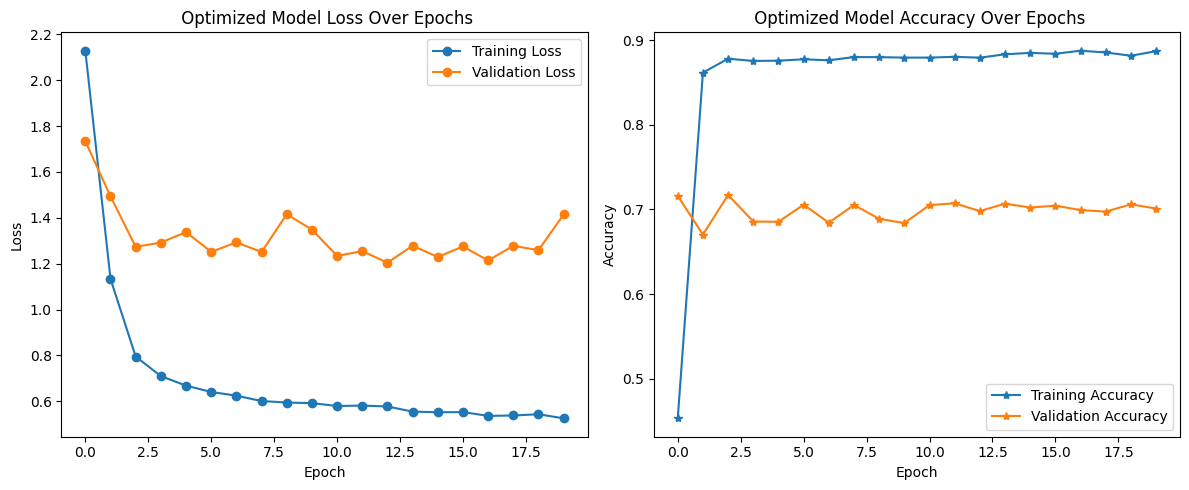

In [ ]:
 # check the CNN model loss and history
 accuracy_and_loss(final_history, cnn_name=" Optimized Model")

313/313 [==============================] - 7s 20ms/step


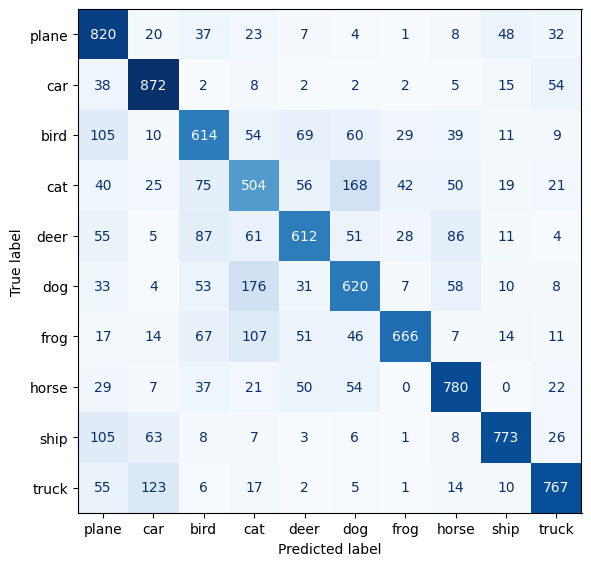

In [ ]:
 # Visualize the confusion matrix for the distribution of true positive, false positive, true negative, and false negative predictions
visualize_confusion_matrix(final_model)

the optimized model was able to correctly classify majority of the cifar-10 test images into their respective classes as shown in the diagonal line. However some classes were mis-classified. The confusion matrix can be summarized below
- 820 plane images were correctly classified as planes (true positive)
- 872 car images were correctly classified as cars (true positive)
- 773 ships images were correctly classified as ships (true positive)
- 666 frog images were correctly classified as frogs (true positive)
- 780 horse images were correctly classified as horses (true positive)
- 60 bird images were incorrectly classified as dogs (false positive)
- 123 truck images were incorrectly classified as cars (false positive)
- 168 cat images were incorrectly classified as dogs (false positive)
- 107 frog images were incorrectly classified as cats (false positive)
- none of the horses were incorrectly classified as frogs and ships

In [ ]:
# evaluation result of the third model
classification_metrics(final_model)

313/313 [==============================] - 10s 33ms/step
Accuracy: 0.7028
Precision: 0.7085
Recall: 0.7028
F1 Score: 0.7024


The final model build using the best hyperparameters shows only a slight improvement compared to the initial model.

## Model Testing
the final model which has been able to demostrate the best perfomance will be saved and tested on the cifar-10 unseen images to confirm it's efficiency in classifying them images in real world

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# path to save the model
model_path = '/content/drive/My Drive/final_model.h5'

# Save the model
final_model.save(model_path)


Mounted at /content/drive


1/1 [==============================] - 0s 37ms/step


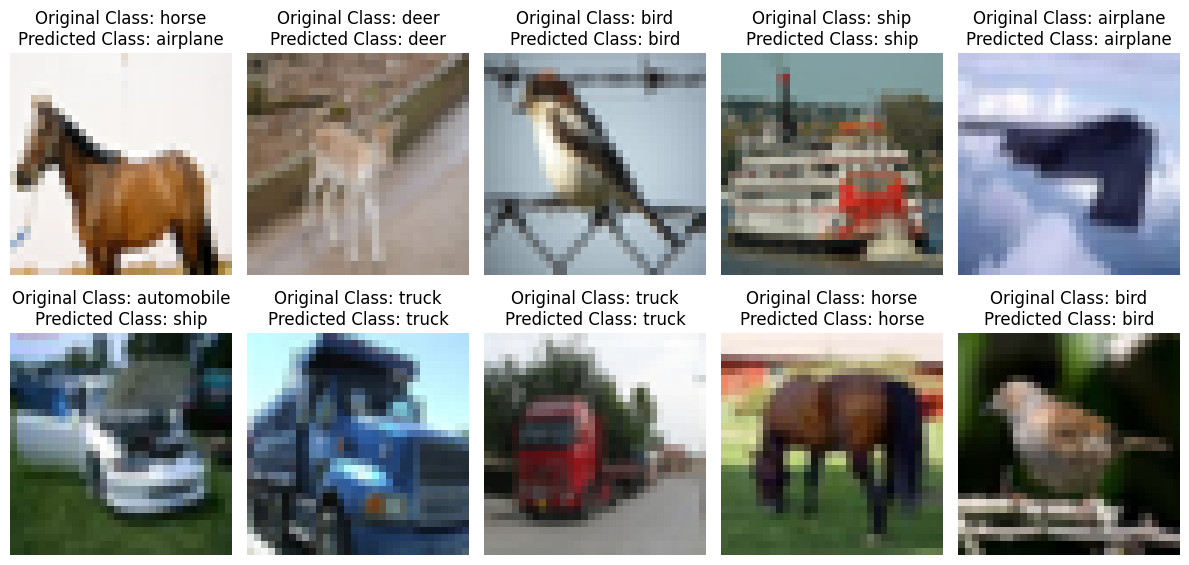

In [ ]:
class_names = {
    0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer',
    5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'
}

# Choosing 10 images randomly
sample_indices = np.random.choice(len(normalized_test_images), size=10, replace=False)
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.flatten()

# Iterate over the selected indices
for i, index in enumerate(sample_indices):
    test_image = normalized_test_images[index]

    # Using the final model to predict the label of the images
    pred = final_model.predict(np.expand_dims(test_image, axis=0))
    pred_label = np.argmax(pred)
    pred_label_name = class_names[pred_label]

    # Map the original label to its corresponding name
    original_label_name = class_names[encoded_test_labels[index]]

    # Display the test image in the subplot
    axes[i].imshow(test_image)
    axes[i].set_title(f"Original Class: {original_label_name}\nPredicted Class: {pred_label_name}")
    axes[i].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


# Observations

- Among the ten (10) test images that were randomly chosen, the final model was able to predict 8 correctly

- the optimized model demostrates the best performance so far with the combination of sigmoid activation function, dropout rate of 0.4, regularizer of 0.01, learning rate of 0.01 and rmsprop optimizer

- there is a slight presence of overfitting, however not so significant since the difference between the training accuracy and the validation accuracy is small

- The model struggled to surpass a 70% performance threshold across all metrics, including accuracy and precision, despite numerous attempts to improve it. This limitation could stem from the significant reduction in size of the CIFAR-10 dataset to 32 by 32 pixels, which may be insufficient for capturing intricate features

- Other enhancing methods can be explored in future research to improve performance; for example, experimenting with other state-of-the-art transfer learning architectures such asEfficientNet or ResNeXt and implementing advanced data augmentation techniques such as CutMix or MixUp